100%|██████████| 2000/2000 [00:01<00:00, 1217.31it/s]


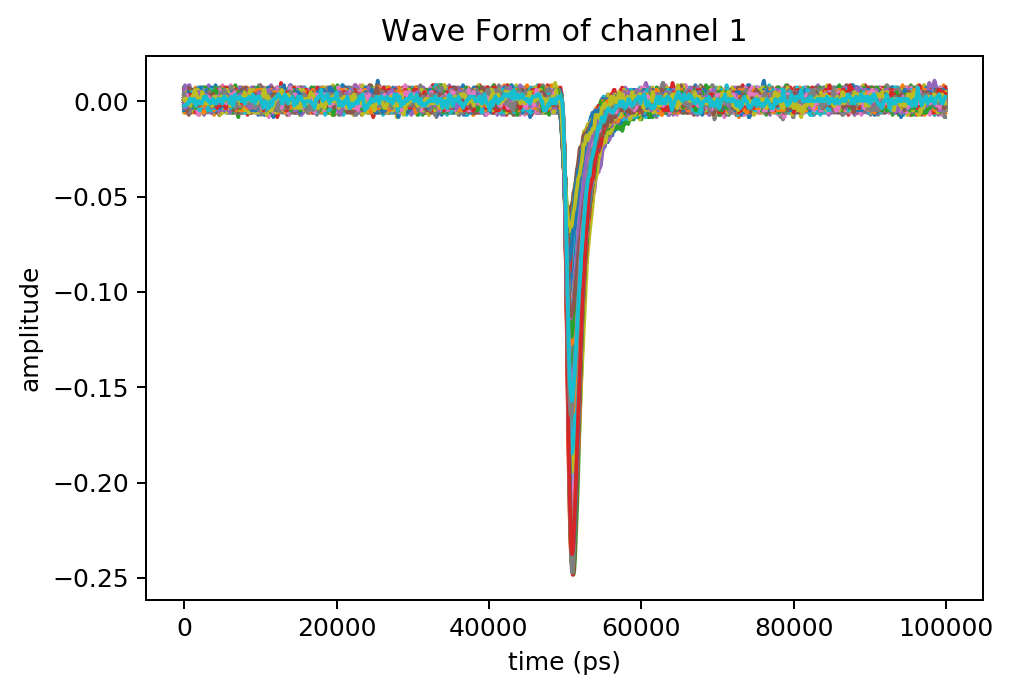

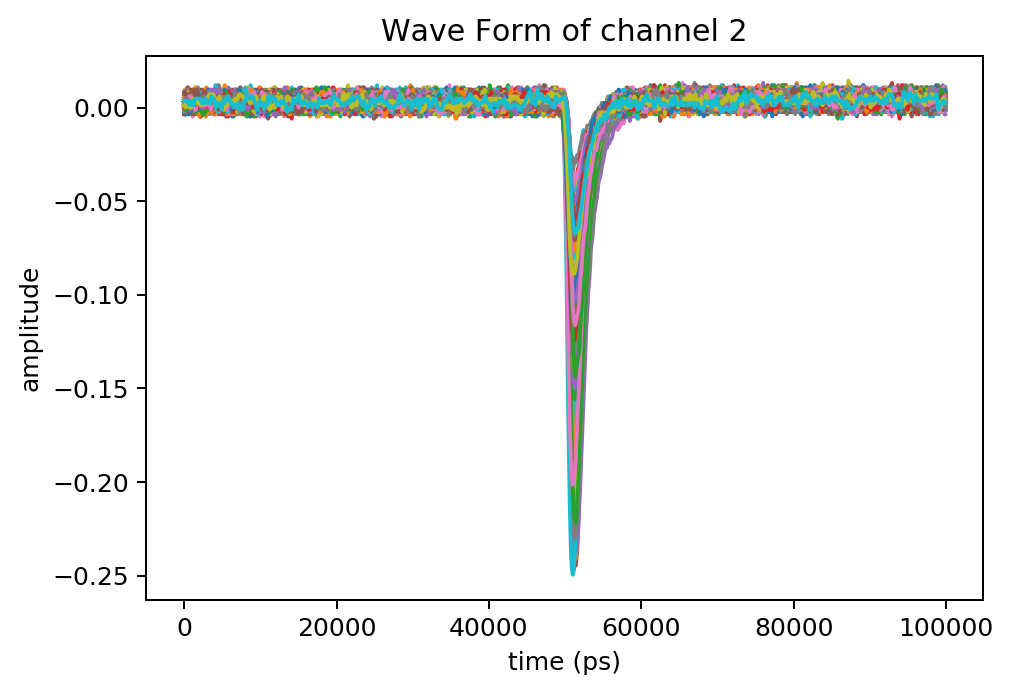

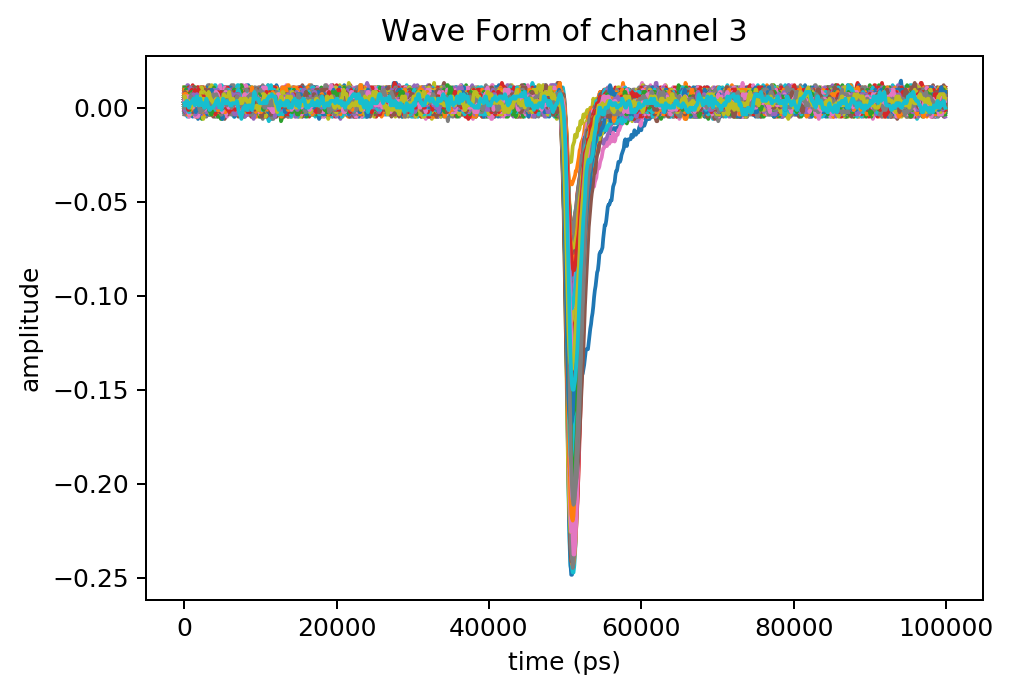

In [1]:
import process as mtd
import mtdProcess as mp
import numpy as np
import h5py
#from jupyterthemes import jtplot
#jtplot.style()
folder="data/Feb4/Board4_HVSweep/Discriminator_Off"
flist = mp.makeList_v0('Feb+\w', folder)

process = mtd.process('Feb4_Disc_off')
#process.source([folder+file,folder+file2])
process.source(flist)
trig = mp.trigger()
trig.trig =0.03
process.scope.trigger = trig.trigger_all3

#dqm_charge = mp.charge_dist_dqm(title = 'charge distribution')
process.waveform_check(1)
process.waveform_check(2)
process.waveform_check(3)
process.path(mp.an_jitter_v0+mp.an_charge_v0)
mp.dqm_jitter.kwargs['title']='Disc off: Jitter vs Charge'
process.dqmPath(mp.dqm_jitter_dts+mp.dqm_jitter)
process.run()

100%|██████████| 2000/2000 [00:00<00:00, 4889.64it/s]


Variable: charge_ch4 not exits, skipped
Variable: charge_ch4 not exits, skipped


/home/tabris/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


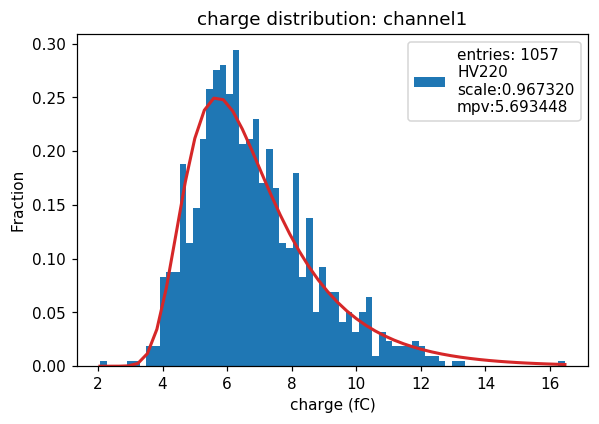

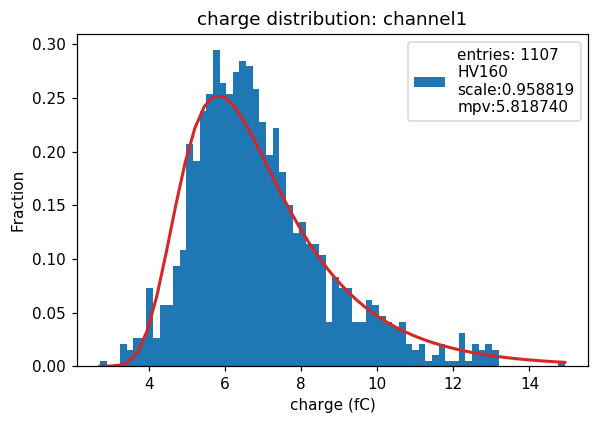

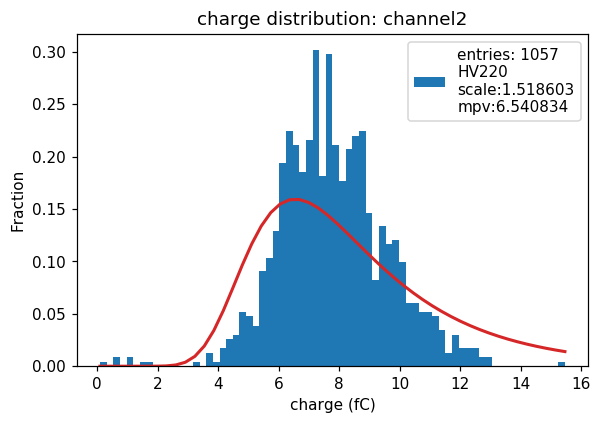

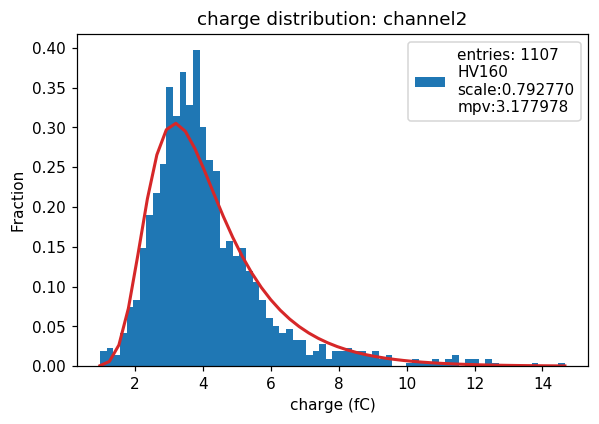

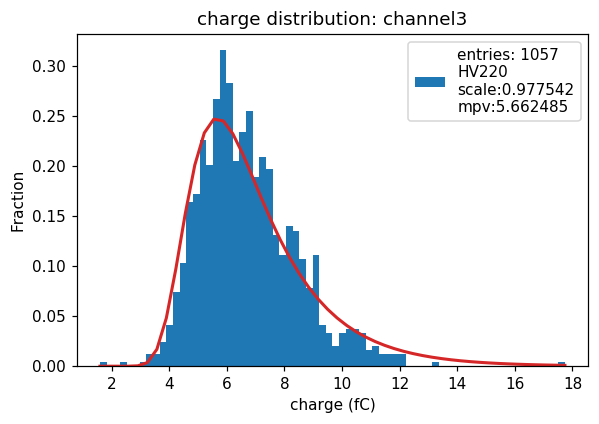

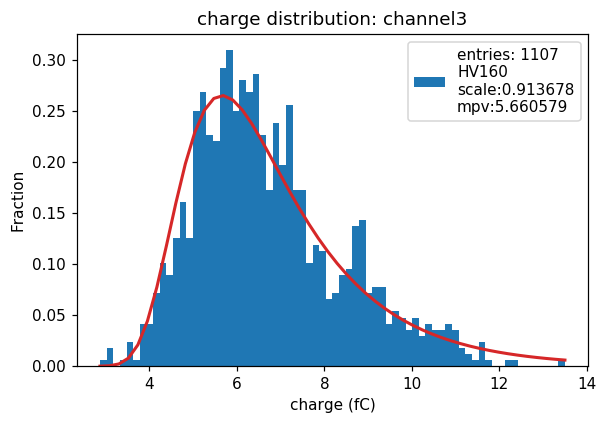

In [1]:
import process as mtd
import mtdProcess as mp
import mtdDQM as dqm
import numpy as np
import h5py
folder="data/Feb4/DACTesting/"
flist = mp.makeList_v0('Feb+\w', folder)

process = mtd.process('Feb4_DACTesting')
#process.source([folder+file,folder+file2])
process.source(flist[1:])
trig = mp.trigger()
trig.trig =0.02
process.scope.trigger = trig.trigger_all3
#process.scope.trigger = trig.trigger_range_ch1
mp.an_jitter_v0.timer.method = 'linear'
#dqm_charge = mp.charge_dist_dqm(title = 'charge distribution')
#process.waveform_check_list = [1,2,3]

mp.dqm_jitter.kwargs['title']='Disc_Off: Jitter vs Charge'

process.path(mp.an_charge_v0)
dqm_charge=dqm.dqm_charge_conversion()
process.dqmPath(dqm_charge)
#process.dqmPath(mp.dqm_charge_ch2+mp.dqm_jitter_dts+mp.dqm_jitter)
#process.path(mp.an_charge_v0)
#process.dqmPath(mp.dqm_charge_ch2)
process.run()

In [ ]:
import process as mtd
import mtdProcess as mp
import numpy as np
import h5py
folder="data/Feb4/UCSC/"
flist = mp.makeList_v0('Feb+\w', folder)

process = mtd.process('Feb4_UCSC')
#process.source([folder+file,folder+file2])
process.source(flist)
trig = mp.trigger()
trig.trig =0.02
process.scope.trigger = trig.trigger_all3
#process.scope.trigger = trig.trigger_range_ch1
mp.an_jitter_v0.timer.method = 'linear'
#dqm_charge = mp.charge_dist_dqm(title = 'charge distribution')
#process.waveform_check_list = [1,2,3]

mp.dqm_jitter.kwargs['title']='UCSC: Jitter vs Charge'

process.path(mp.an_charge_v0+mp.an_jitter_v0)
process.dqmPath(mp.dqm_charge_ch2+mp.dqm_jitter_dts+mp.dqm_jitter)
#process.path(mp.an_charge_v0)
#process.dqmPath(mp.dqm_charge_ch2)
process.run()

100%|██████████| 2000/2000 [00:01<00:00, 1404.78it/s]


In [3]:
flist = mp.makeList_v0('Feb+\w', folder)
#process.source([folder+file,folder+file2])
print(flist[1])

data/Feb4/DACTesting/Feb4_Brd4_HV220-Ch2_HP_DG_DiscriOn_DAC330_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv5k/Feb4_Brd4_HV220-Ch2_HP_DG_DiscriOn_DAC330_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv5k_0.hdf5


587 18487.59689922481
493 -446.58385093167453


(array([853.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ -446.58385093,  1446.83422408,  3340.2522991 ,  5233.67037412,
         7127.08844913,  9020.50652415, 10913.92459916, 12807.34267418,
        14700.76074919, 16594.17882421, 18487.59689922]),
 <a list of 10 Patch objects>)

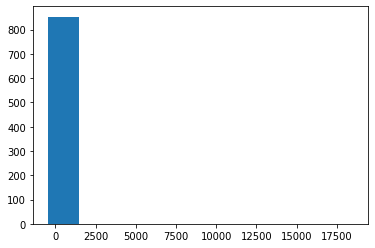

In [8]:
import matplotlib.pyplot as plt
y = mp.dqm_jitter_dt21.dt21['Feb4_UCSC_HV200-Ch2_HP_DG'\
                            '_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv_0']
print(np.argmax(np.array(y)),np.amax(np.array(y)))
print(np.argmin(np.array(y)),np.amin(np.array(y)))
plt.hist(y)

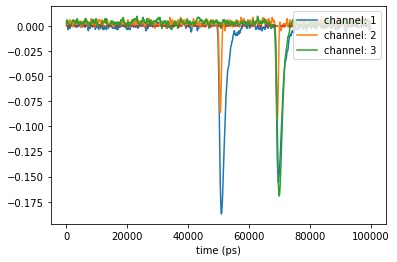

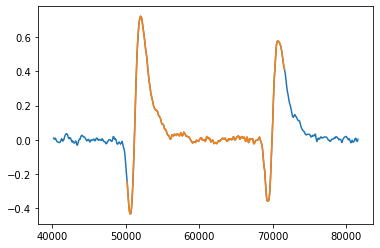

100


In [34]:
file = 'data/Feb4/UCSC/Feb4_UCSC_HV200-'\
    'Ch2_HP_DG_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv/Feb4'\
    '_UCSC_HV200-Ch2_HP_DG_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv_0.hdf5'
process.scope.loadData(file)
process.scope.sliceEvent()
target = 588
counts=0

mp.an_jitter_v0.dt21.clear()

for i in range(process.scope.nevent):
    p,b=process.scope.triggeredEvent(i)
    if b: 
        counts = counts+1
        if counts == target : 
            mp.an_jitter_v0.jitter_beamSetup_v0(p)
            t = mp.an_jitter_v0.get_cftiming(p,[1,2,3])
            process.scope.showEvent(i, [1,2,3])
            mp.an_jitter_v0.timer.debug(p[0],p[1])
            break
x = process.scope.getEventAdjusted(1)[0]

print(x[1]-x[0])

In [6]:
import h5py 

f = h5py.File('test_output.h5','r')
try:
    y = f['d']
except:
    print('Variable:')

Variable:
